# Mongo U3 #

## Integrantes: ##
- ### Ricardo Raúl Castro Luna - 18131227 ###

## Instalación de Mongo

Se ingresa a la pagina oficial de mongo para descargar el instalador de mongodb
https://www.mongodb.com/try/download/community

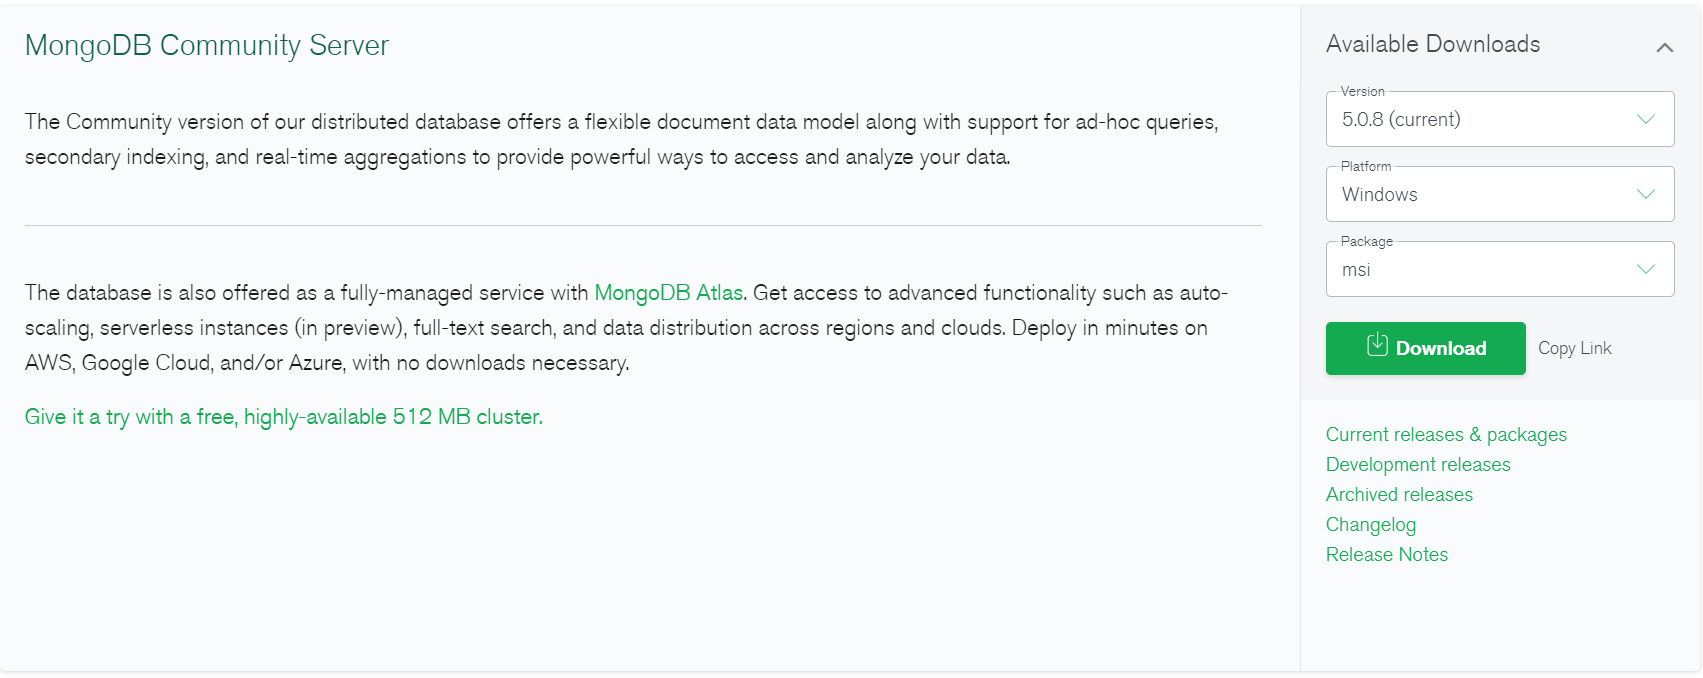

Cuando ya se haya acabado de descargar el instalador se le hace click en este para comenzar la instalación,
le deberia salir una ventana como esta 
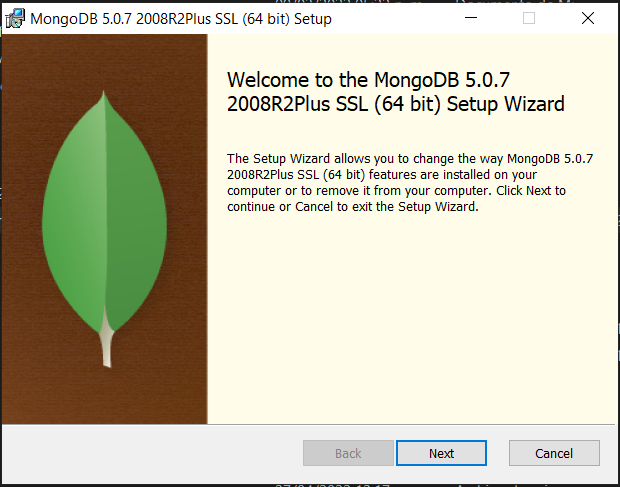

Practicamente casi todo los que tiene que hacer es hacer click en siguiente, para evitar problemas con una configuración personalizada

En un momento les preguntara si quieren instalar mongo compass, yo recomiendo hacerlo para evitar problemas con la terminal ya que es mas facil realizar acciones como hacer la conexion al localhost y importar el csv en compass
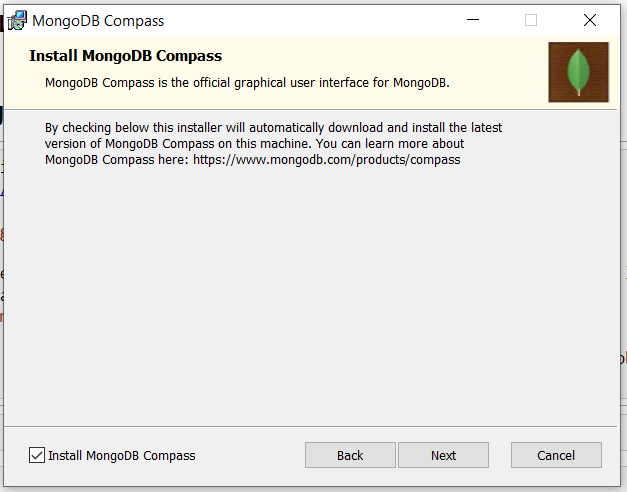

Ya cuando les salga esta ventana significa que ya la instalación se completo e ya puede utilizar mongo y mongo compass
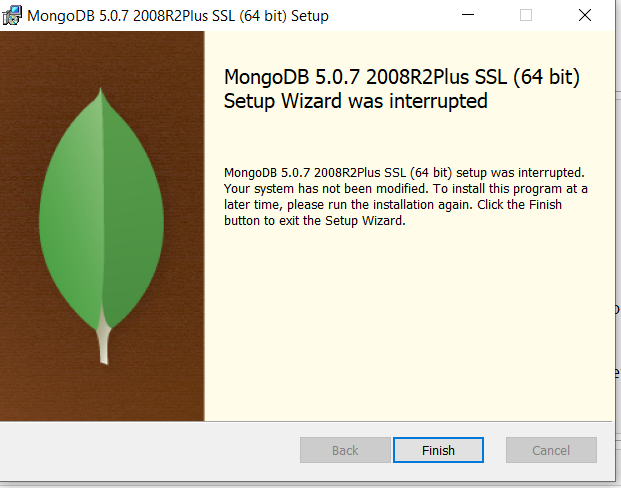

## Instalación de pymongo en Anaconda

Se entra en Anaconda y se hace en click en "Environments" para luego poner en el buscador de la derecha "mongo" para asi encontrarlos mas facilmente
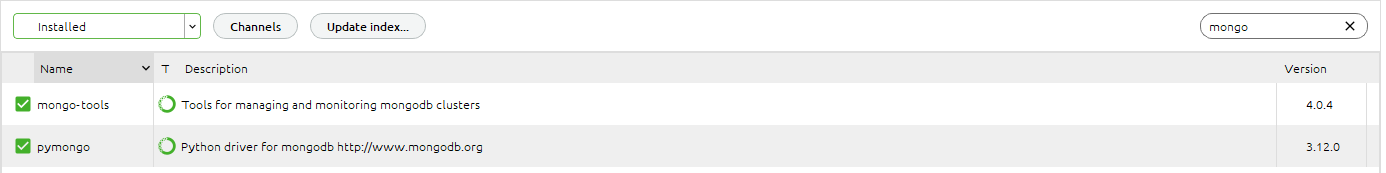
En el spinner deberia poner "not installed" pero como yo ya los instale asi, aunque no hay ninguna diferencia
Se les tiene que hacer click en los recuadros de la izquierda para depsues en la parte de abajo dar click en "apply"

## Importar CSV

Para importar los datos a una colección:


**1.** Conéctese a la pestaña que contiene la colección a la que desea importar los datos. 
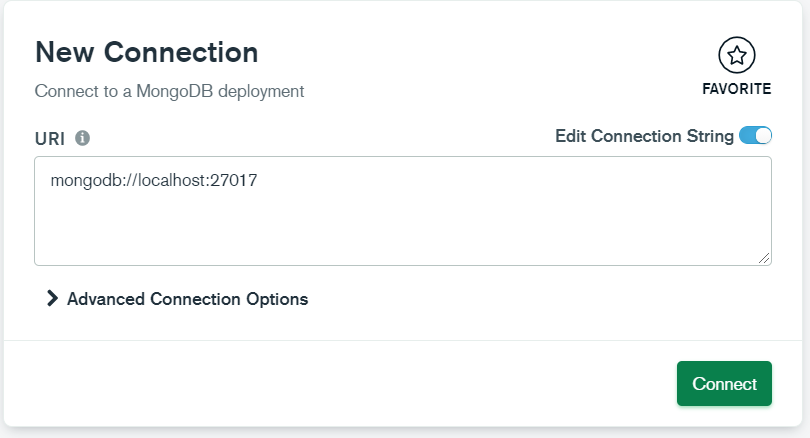

**2.** Navegue hasta la colección deseada o crear la colección. 
    Puede seleccionar la colección dentro de la pestaña databases o hacer clic en la colección en el panel izquierdo.
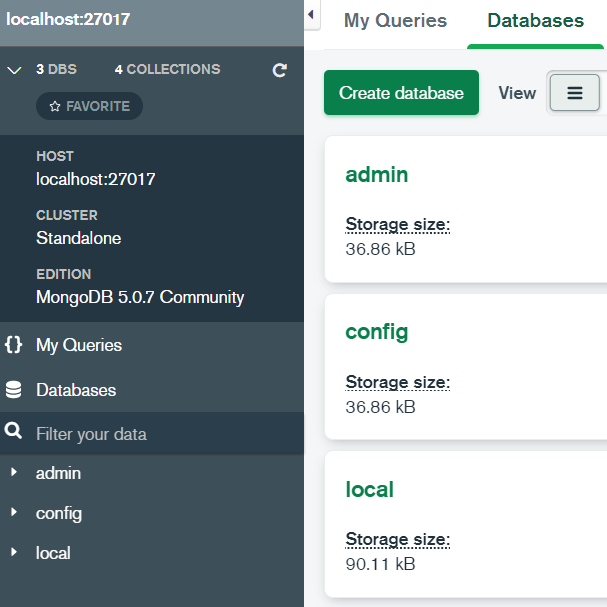
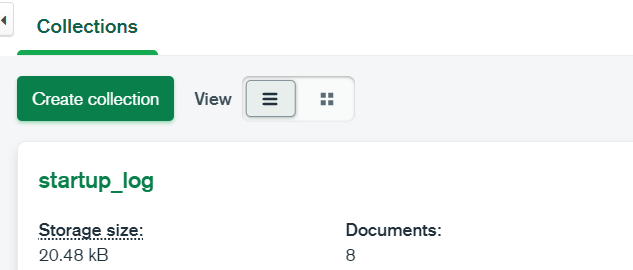
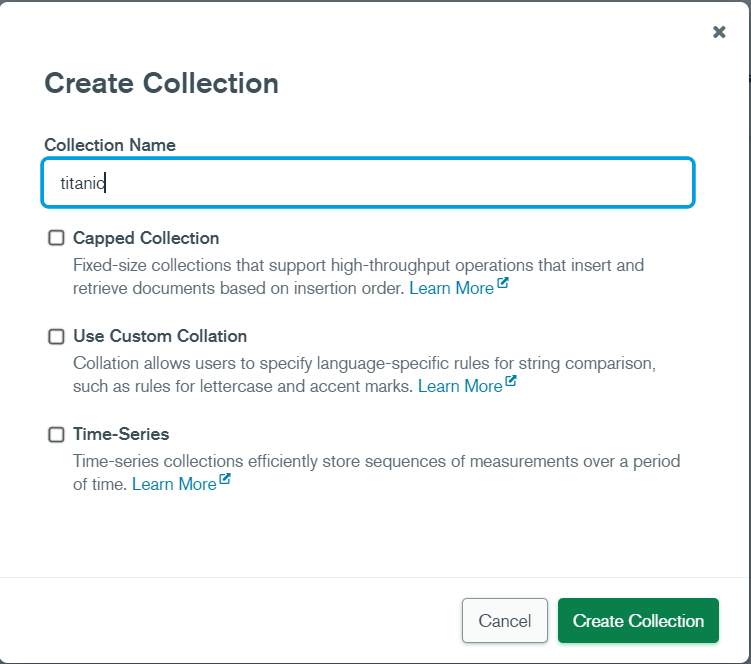

**3.** Haga clic en el menú desplegable Añadir datos y seleccione Importar archivo
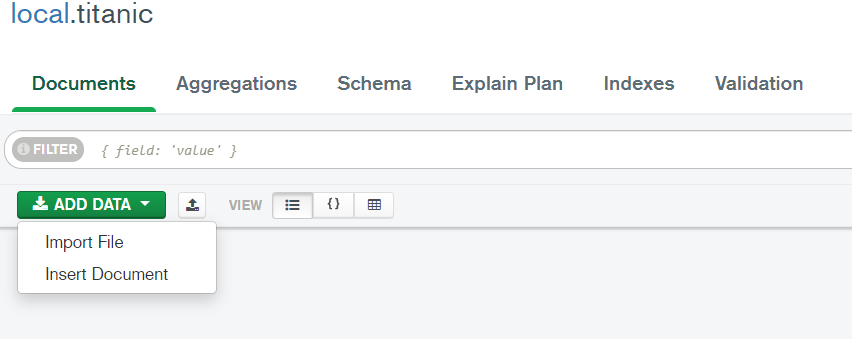
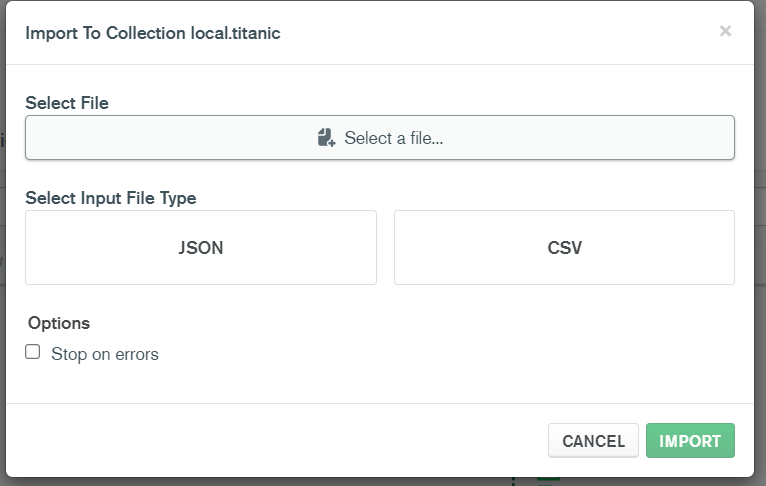

**4.** Seleccione la ubicación de origen del archivo en Seleccionar archivo.

**5.** Elija el tipo de archivo apropiado.
        En Seleccionar tipo de archivo de entrada, seleccione JSON o CSV.
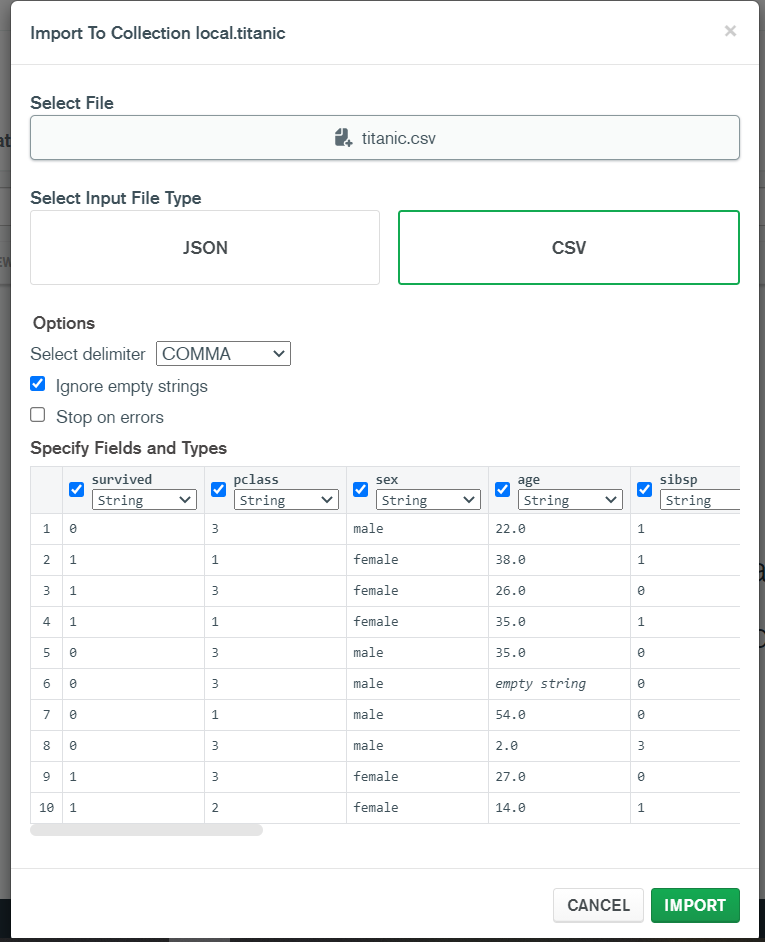      
        
Se puede especificar los campos a importar y los tipos de esos campos en Especificar campos y tipos. El tipo de datos por defecto para todos los campos es String.
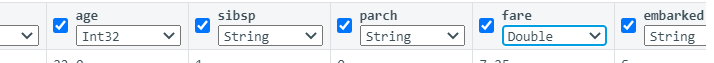

Se puede alternar entre Ignorar cadenas vacías y Detener en caso de error:

Si se marca, Ignorar cadenas vacías elimina los campos con valores de cadena vacíos de sus documentos importados. El documento se sigue importando con todos los demás campos.

Si está marcada, la opción Detener en caso de error impide que se importen los datos en caso de error. Si no está marcada, los datos se insertan hasta que se encuentra un error y las inserciones exitosas no se revierten. 

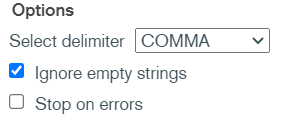

**6.** Haga clic en Importar.
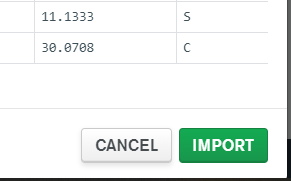

In [1]:
# importar la liberia de pymongo a notebook
import pymongo

#importar la libreria de Pandas
import pandas as pd

# importar Matplotlib, pyplot
import matplotlib.pyplot as plt

# Mas adelante la impresión de salida de los datos con el uso de print se vera imposible
#  para evitar ese problema usaremos una liberia de python llamada: 'pprint'
from pprint import pprint

# Ejemplo de uso de pprint:

# for item in my_collection.find():
#    pprint(item)

In [2]:
# Se va a conectar a un Mongo Cliente
# Este se va conectar al host y port por default
# en mi caso yo cree una variable con donde tiene el puerto y el host
# pero siempre se puede poner dentro del MongoClient

mongo_uri = "mongodb://localhost:27017/"  
client = pymongo.MongoClient(mongo_uri)

In [3]:
# Usando client que es nuestra conexion al mongo cliente
# podemos llegar a conseguir una lista de los nombres 
# de todas las bases de datos que tiene

client.list_database_names()

['admin', 'config', 'local']

In [4]:
# Accedemos a la base de datos local

db = client.local

In [5]:
# Luego hacemos que nos muestre una
# lista de las colecciones que tiene la base de datos

db.list_collection_names()

['titanic', 'startup_log']

In [6]:
# Accedemos a la collecion de titanic

table = db.titanic 

# Entonces ya que estemos en la collecion
# ya se puede interactuar con los elementos de este

# Como regresar el numero de elementos en la tabla
table.count_documents({}) 

891

### Consultas de ejemplo de la conexion

In [7]:
table.find_one()

{'_id': ObjectId('626daf8a8cc6a618f91529ff'),
 'survived': '0',
 'pclass': '3',
 'sex': 'male',
 'age': 22,
 'sibsp': '1',
 'parch': '0',
 'fare': 7.25,
 'embarked': 'S',
 'class': 'Third',
 'who': 'man',
 'adult_male': 'True',
 'embark_town': 'Southampton',
 'alive': 'no',
 'alone': 'False'}

In [8]:
table.find_one().keys()

dict_keys(['_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'])

# Consultas Simples

## find_one() | find()

In [9]:
# Esta metodo devuelve un solo valor si los datos se encuentran en la base de datos, de lo contrario devuelve None. 
#  Devuelve la primera una ocurrencia de la información almacenada en la colección. 
#  El primer parámetro del método find() es un objeto de consulta. 
#  Si se usa un objeto Query vacío, este seleccionará toda la información de la colección.

# Funciona igual que SELECT* sin ningún parámetro.

table.find_one({"survived": "0", "deck": "C"})

{'_id': ObjectId('626daf8a8cc6a618f9152a1a'),
 'survived': '0',
 'pclass': '1',
 'sex': 'male',
 'age': 19,
 'sibsp': '3',
 'parch': '2',
 'fare': 263.0,
 'embarked': 'S',
 'class': 'First',
 'who': 'man',
 'adult_male': 'True',
 'deck': 'C',
 'embark_town': 'Southampton',
 'alive': 'no',
 'alone': 'False'}

In [10]:
# El método find() se utiliza para seleccionar datos de la base de datos. 
#  Devuelve todas las ocurrencias de la información almacenada en la colección. 
#  El primer parámetro del método find() es un objeto de consulta. 
#  Si se usa un objeto Query vacío, este seleccionará toda la información de la colección.

# Funciona igual que SELECT* sin ningún parámetro.

# Cuando se usa find() se puede usar limit() pues como este mismo
# dice para limitar la cantidad de seleccion de datos,
# si se pone el limit en 1 se comportaria igual que find_one()

cursor = table.find({"survived": "0", "deck": "C"}).limit(2)
for titanic in cursor:
    pprint(titanic)

{'_id': ObjectId('626daf8a8cc6a618f9152a1a'),
 'adult_male': 'True',
 'age': 19,
 'alive': 'no',
 'alone': 'False',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Southampton',
 'embarked': 'S',
 'fare': 263.0,
 'parch': '2',
 'pclass': '1',
 'sex': 'male',
 'sibsp': '3',
 'survived': '0',
 'who': 'man'}
{'_id': ObjectId('626daf8a8cc6a618f9152a3d'),
 'adult_male': 'True',
 'age': 45,
 'alive': 'no',
 'alone': 'False',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Southampton',
 'embarked': 'S',
 'fare': 83.475,
 'parch': '0',
 'pclass': '1',
 'sex': 'male',
 'sibsp': '1',
 'survived': '0',
 'who': 'man'}


## sort()

In [11]:
#El método sort() se utiliza para clasificar la base de datos en algún orden. 
# Este método acepta dos parámetros, el primero es el nombre del campo y el segundo es la dirección de la ordenación. 
# (Por defecto ordena en orden ascendente)

# Tambien se puede usar 1 como la dirección se utiliza para el orden ascendente 
#  y -1 como la dirección se utiliza para el orden descendente

cursor = table.find({"survived": "0", "deck": "C"}).sort('survived', pymongo.ASCENDING)
for titanic in cursor:
    pprint(titanic)

{'_id': ObjectId('626daf8a8cc6a618f9152a1a'),
 'adult_male': 'True',
 'age': 19,
 'alive': 'no',
 'alone': 'False',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Southampton',
 'embarked': 'S',
 'fare': 263.0,
 'parch': '2',
 'pclass': '1',
 'sex': 'male',
 'sibsp': '3',
 'survived': '0',
 'who': 'man'}
{'_id': ObjectId('626daf8a8cc6a618f9152a3d'),
 'adult_male': 'True',
 'age': 45,
 'alive': 'no',
 'alone': 'False',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Southampton',
 'embarked': 'S',
 'fare': 83.475,
 'parch': '0',
 'pclass': '1',
 'sex': 'male',
 'sibsp': '1',
 'survived': '0',
 'who': 'man'}
{'_id': ObjectId('626daf8a8cc6a618f9152a6d'),
 'adult_male': 'True',
 'age': 47,
 'alive': 'no',
 'alone': 'True',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Southampton',
 'embarked': 'S',
 'fare': 52.0,
 'parch': '0',
 'pclass': '1',
 'sex': 'male',
 'sibsp': '0',
 'survived': '0',
 'who': 'man'}
{'_id': ObjectId('626daf8a8cc6a618f9152a88'),
 'adult_male': 'True',
 'age

In [12]:
# Aqui uso el limit() para mostrar que no solo por que se usar sort()
#  no se puede pueda usar otros metodos en este

cursor = table.find({"survived": "0", "deck": "C"}).sort('survived', -1).limit(2)
for titanic in cursor:
    pprint(titanic)

{'_id': ObjectId('626daf8a8cc6a618f9152a1a'),
 'adult_male': 'True',
 'age': 19,
 'alive': 'no',
 'alone': 'False',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Southampton',
 'embarked': 'S',
 'fare': 263.0,
 'parch': '2',
 'pclass': '1',
 'sex': 'male',
 'sibsp': '3',
 'survived': '0',
 'who': 'man'}
{'_id': ObjectId('626daf8a8cc6a618f9152a3d'),
 'adult_male': 'True',
 'age': 45,
 'alive': 'no',
 'alone': 'False',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Southampton',
 'embarked': 'S',
 'fare': 83.475,
 'parch': '0',
 'pclass': '1',
 'sex': 'male',
 'sibsp': '1',
 'survived': '0',
 'who': 'man'}


## index()

In [13]:
# Este crea un índice. Por defecto, _id es el único índice presente en la colección. 
#  Esta metodo puede aceptar una clave o una lista de pares (clave, dirección).
    
table.create_index("deck")


# Regresa un diccionario en el que las claves son los nombres de los índices
#  y los valores son diccionarios que contienen información sobre cada índice. 
#  Se garantiza que el diccionario contiene al menos una clave única, "key", 
#  que es una lista de pares (key, dirección) que especifican el índice.

table.index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'deck_1': {'v': 2, 'key': [('deck', 1)]}}

In [14]:
# El método drop_index() permite eliminar uno de los índices de una colección. 
#  Se le pasa un parámetro en el método, el nombre del indice que se desea eliminar. 

table.create_index("deck")
table.create_index("embarked")
table.index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'deck_1': {'v': 2, 'key': [('deck', 1)]},
 'embarked_1': {'v': 2, 'key': [('embarked', 1)]}}

In [15]:
table.drop_index("deck_1") 
table.index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'embarked_1': {'v': 2, 'key': [('embarked', 1)]}}

In [16]:
# El método drop_indexes() permite eliminar todos los índices de una colección. 
#  No se pasa ningún parámetro en el método. Sólo el índice por defecto _id no puede ser eliminado. 
#  Todos los índices sin _id serán eliminados por este método. 
#  Esto significa que sólo podemos eliminar el índice que hemos creado.

table.drop_indexes() 

In [17]:
table.index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]}}

## remove()

In [18]:
# Esta metodo elimina un solo valor si los datos se encuentran en la base de datos, de lo contrario no elimina nada. 
#  Elimina la primera una ocurrencia de la información almacenada en la colección. 
#  El primer parámetro del método delete_one() es un filtro que consulta las ocurrencia en la colección. 

table.delete_one({"survived": "0", "deck": "C"})

In [19]:
table.count_documents({})

890

In [20]:
# El método delete_many() se utiliza para eliminar datos de la base de datos. 
#  Elimina todas las ocurrencias de la información almacenada en la colección, de lo contrario no elimina nada. 
#  El primer parámetro del método delete_many() es un filtro que consulta las ocurrencias en la colección. 

table.delete_many({"deck": "B"})

In [21]:
table.count_documents({})

843

## Upsert() & Update()

In [22]:
# Creación de los diccionarios con los datos a cambiar en la colección
#  no es necesario hacerlo de esta manera, se puede hacer de forma directa
#  a la hora de ingresar los parametros.

dic1 = {
        'adult_male': 'True',
        'age': 20.0,
        'alive': 'no',
        'class': 'First',
        'deck': 'B',
        'sex': 'male',
        }
dic2 = {
        'adult_male': 'False',
        'age': 56.0,
        'alive': 'yes',
        'alone': 'True',
        'class': 'First',
        'embark_town': 'Cherbourg',
        'fare': 100,
        'sex': 'female',
        'who': 'woman'
        }

In [23]:
# Se usa el find_one() como una forma de hacer un antes y un despues de los updates

table.find_one({"fare" : { '$gt' : 120 }})

{'_id': ObjectId('626daf8a8cc6a618f9152a57'),
 'survived': '1',
 'pclass': '1',
 'sex': 'female',
 'age': 23,
 'sibsp': '3',
 'parch': '2',
 'fare': 263.0,
 'embarked': 'S',
 'class': 'First',
 'who': 'woman',
 'adult_male': 'False',
 'deck': 'C',
 'embark_town': 'Southampton',
 'alive': 'yes',
 'alone': 'False'}

In [24]:
# Este método se centra principalmente en dos argumentos que pasamos, uno es el objeto de consulta que sirve como filtro
#  que define el documento a actualizar y el segundo es un objeto que define los nuevos valores del documento
#  y el resto de argumentos son opcionales. Esta función encuentra el primer documento que coincide con la consulta 
#  y lo actualiza, resumiendo, actualiza un único documento dentro de la colección en función al filtro. 

table.update_one (
    { "fare" : { '$gt' : 120 } },
        {
            "$set": dic1
        },
    False
)
table.count_documents({})

843

In [25]:
table.find_one({"fare" : { '$gt' : 120 }})

{'_id': ObjectId('626daf8a8cc6a618f9152a57'),
 'survived': '1',
 'pclass': '1',
 'sex': 'male',
 'age': 20.0,
 'sibsp': '3',
 'parch': '2',
 'fare': 263.0,
 'embarked': 'S',
 'class': 'First',
 'who': 'woman',
 'adult_male': 'True',
 'deck': 'B',
 'embark_town': 'Southampton',
 'alive': 'no',
 'alone': 'False'}

In [26]:
cursor = table.find({"embark_town" : "Cherbourg"}).limit(2)
for titanic in cursor:
    pprint(titanic)

{'_id': ObjectId('626daf8a8cc6a618f9152a00'),
 'adult_male': 'False',
 'age': 38,
 'alive': 'yes',
 'alone': 'False',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Cherbourg',
 'embarked': 'C',
 'fare': 71.2833,
 'parch': '0',
 'pclass': '1',
 'sex': 'female',
 'sibsp': '1',
 'survived': '1',
 'who': 'woman'}
{'_id': ObjectId('626daf8a8cc6a618f9152a08'),
 'adult_male': 'False',
 'age': 14,
 'alive': 'yes',
 'alone': 'False',
 'class': 'Second',
 'embark_town': 'Cherbourg',
 'embarked': 'C',
 'fare': 30.0708,
 'parch': '0',
 'pclass': '2',
 'sex': 'female',
 'sibsp': '1',
 'survived': '1',
 'who': 'child'}


In [27]:
# Este método se centra principalmente en dos argumentos que pasamos, uno es el objeto de consulta que sirve como filtro
#  que define los documentos a actualizar y el segundo es un objeto que define los nuevos valores de los documentos
#  y el resto de argumentos son opcionales. Esta función encuentra todos los documentos que coincide con la consulta 
#  y lo actualiza, resumiendo, actualiza todos los documentos dentro de la colección en función al filtro. 

table.update_many (
    { "embark_town" : "Cherbourg" },
        {
            "$set": dic2
        },
    False
)
table.count_documents({})

843

In [28]:
cursor = table.find({"embark_town" : "Cherbourg"}).limit(2)
for titanic in cursor:
    pprint(titanic)

{'_id': ObjectId('626daf8a8cc6a618f9152a00'),
 'adult_male': 'False',
 'age': 56.0,
 'alive': 'yes',
 'alone': 'True',
 'class': 'First',
 'deck': 'C',
 'embark_town': 'Cherbourg',
 'embarked': 'C',
 'fare': 100,
 'parch': '0',
 'pclass': '1',
 'sex': 'female',
 'sibsp': '1',
 'survived': '1',
 'who': 'woman'}
{'_id': ObjectId('626daf8a8cc6a618f9152a08'),
 'adult_male': 'False',
 'age': 56.0,
 'alive': 'yes',
 'alone': 'True',
 'class': 'First',
 'embark_town': 'Cherbourg',
 'embarked': 'C',
 'fare': 100,
 'parch': '0',
 'pclass': '2',
 'sex': 'female',
 'sibsp': '1',
 'survived': '1',
 'who': 'woman'}


## Vista 

In [29]:
# Creación del DataFrame
#  Usando el metodo find() de pymongo para asi que nos regrese todos los datos
#   en la colección, regresandonos un objeto Cursor que podemos transformalo en una lista
#   con list() para asi al final usando el metodo DataFrame de pandas
#   crear un dataframe de la colección.


df = pd.DataFrame(list(table.find()))
df

,_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,deck
0,626daf8a8cc6a618f91529ff,0,3,male,22.0,1,0,7.250,S,Third,man,True,Southampton,no,False,NaN
1,626daf8a8cc6a618f9152a00,1,1,female,56.0,1,0,100.000,C,First,woman,False,Cherbourg,yes,True,C
2,626daf8a8cc6a618f9152a01,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Southampton,yes,True,NaN
3,626daf8a8cc6a618f9152a02,1,1,female,35.0,1,0,53.100,S,First,woman,False,Southampton,yes,False,C
4,626daf8a8cc6a618f9152a03,0,3,male,35.0,0,0,8.050,S,Third,man,True,Southampton,no,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,626daf8a8cc6a618f9152d74,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,Queenstown,no,False,NaN
839,626daf8a8cc6a618f9152d75,0,2,male,27.0,0,0,13.000,S,Second,man,True,Southampton,no,True,NaN
840,626daf8a8cc6a618f9152d77,0,3,female,NaN,1,2,23.450,S,Third,woman,False,Southampton,no,False,NaN
841,626daf8a8cc6a618f9152d78,1,1,female,56.0,0,0,100.000,C,First,woman,False,Cherbourg,yes,True,C


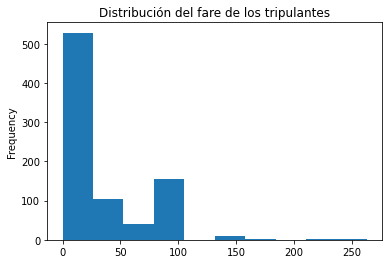

In [30]:
# Se le aplica el metodo plot() a 'fare' del dataframe, donde este recibe
#  de parametros el tipo de grafica que en este caso es hist
#  y el titulo que este va tener.

# Esta gráfica representa la distribución de 'fare' en la colección

# Y al final se usa el metodo show() en plt que es abreviación del import de Matplotlib, pyplot

df['fare'].plot(kind='hist',title="Distribución del fare de los tripulantes" )
plt.show()

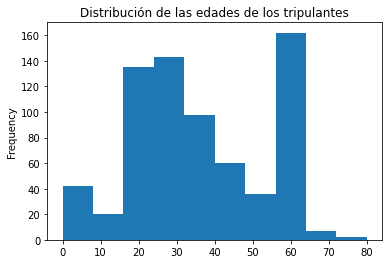

In [31]:
# Esta gráfica representa la distribución de 'age' en la colección

df['age'].plot(kind='hist',title="Distribución de las edades de los tripulantes" )
plt.show()

## Agregate

In [32]:
# El método de aggregate() se utiliza principalmente para procesar los datos de múltiples filas 
#  y devuelve el resultado al usuario. Se basa en el pipeline de procesamiento de datos 
#  e incluye múltiples etapas al final de las cuales se obtiene el resultado agregado. 
#  Una de las etapas del método de agregación incluye $group. 
#  Esta operación agrupa los documentos que ingreses de la colección por la expresión identificadora puesta por el usuario 
#  y luego le aplica la expresión acumuladora.

# $group incluye lo siguiente:
#  _id: Los documentos se agrupan según la expresión de la id.
#  campo (Opcional): Incluye la expresión acumuladora que se aplicara a los documentos.


cursor = table.aggregate(
    [
        {"$group" : 
         {
            "_id" : "$alive", 
             "count" : {"$sum" : 1}
         }
        }
    ]
)

for titanic in cursor:
    pprint(titanic)

{'_id': 'yes', 'count': 376}
{'_id': 'no', 'count': 467}


In [33]:
cursor = table.aggregate(
    [
        {"$group" : 
         {
            "_id" : "$sex", 
             "count" : {"$sum" : 1}
         }
        }
    ]
)

for titanic in cursor:
    pprint(titanic)

{'_id': 'female', 'count': 371}
{'_id': 'male', 'count': 472}
